<h1>Mike Bliss  Capstone Project</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import ipywidgets
import panel as pn
from panel.interact import interact
pn.extension()
%matplotlib inline

<h3>Load data set using the built in scikit learn handwritten numerical digits data set</h3>
<p>Displayed below are the first 4 images of the test data set. Notice they are 8x8 images of handwritten numerical digits.</p>

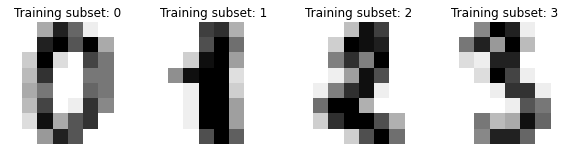

In [3]:
num_digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, num_digits.images, num_digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training subset: %i" % label)

<h3>Currently, the data is stored in a 3d matrix. It must be pre-processed and reshapen into a 2d array.</h3>

In [4]:
    n_samples = len(num_digits.images)
    data = num_digits.images.reshape((n_samples, -1))

<h3>The machine learning algorithm being used is known as a "support vector classifier"</h3>
<p>A model is created, named my_model. The data set is split into 2 different sets. One set is used for training the SVC model , and the other is used to test the accuracy of the model's training.</p>

In [5]:
    my_model = svm.SVC(gamma=0.001)
    
    X_train, X_test, y_train, y_test = train_test_split(
    data, num_digits.target, test_size=0.5, shuffle=False
    )

<h3>The model is trained using the .fit() method and the test subset.</h3>

In [6]:
    my_model.fit(X_train, y_train)


SVC(gamma=0.001)

<h3>Now the test subset is fed to the model for it to make it's predictions.</h3> 
<p>The model makes it's predictions, which are labeled above the images.</p>

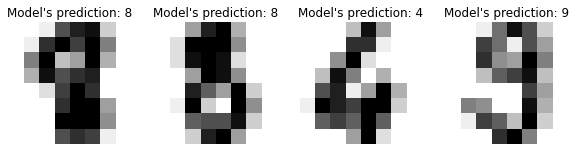

In [7]:
    predicted = my_model.predict(X_test)

    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Model's prediction: {prediction}")

<h3>A confusion matrix is used to display the accuracy of each prediction.</h3> 
<p>It not only displays the accurate predictions, but also displays the inaccurate predictions as well as how many times each inaccuracy was made.</p>

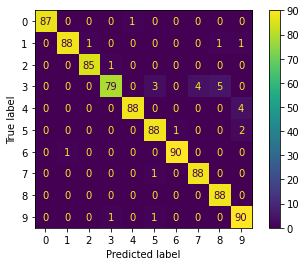

In [8]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
plt.show()


<h3>Click the button to calculate the accuracy score for the model's predictions.</h3>


In [22]:
score = pn.widgets.StaticText()

def accuracy_score(event):
    score.value = metrics.accuracy_score(y_test, predicted)
    display(score)
    
button = pn.widgets.Button(name='Click to see accuracy score', button_type='primary')

button.on_click(accuracy_score)

pn.Column(button, score)

Column
    [0] Button(button_type='primary', name='Click to see a...)
    [1] StaticText()